In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
data = pd.read_csv('housing.csv')

In [47]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [48]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [49]:
total_bedroms = data[data["total_bedrooms"].notnull()]["total_bedrooms"]

In [50]:
print(data.iloc[:,4:5].head())
#Filling the missing values with the mean of the respective column
from sklearn.preprocessing import Imputer
imputer = Imputer(np.nan,strategy ="mean")
imputer.fit(data.iloc[:,4:5])
data.iloc[:,4:5] = imputer.transform(data.iloc[:,4:5])
data.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [51]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


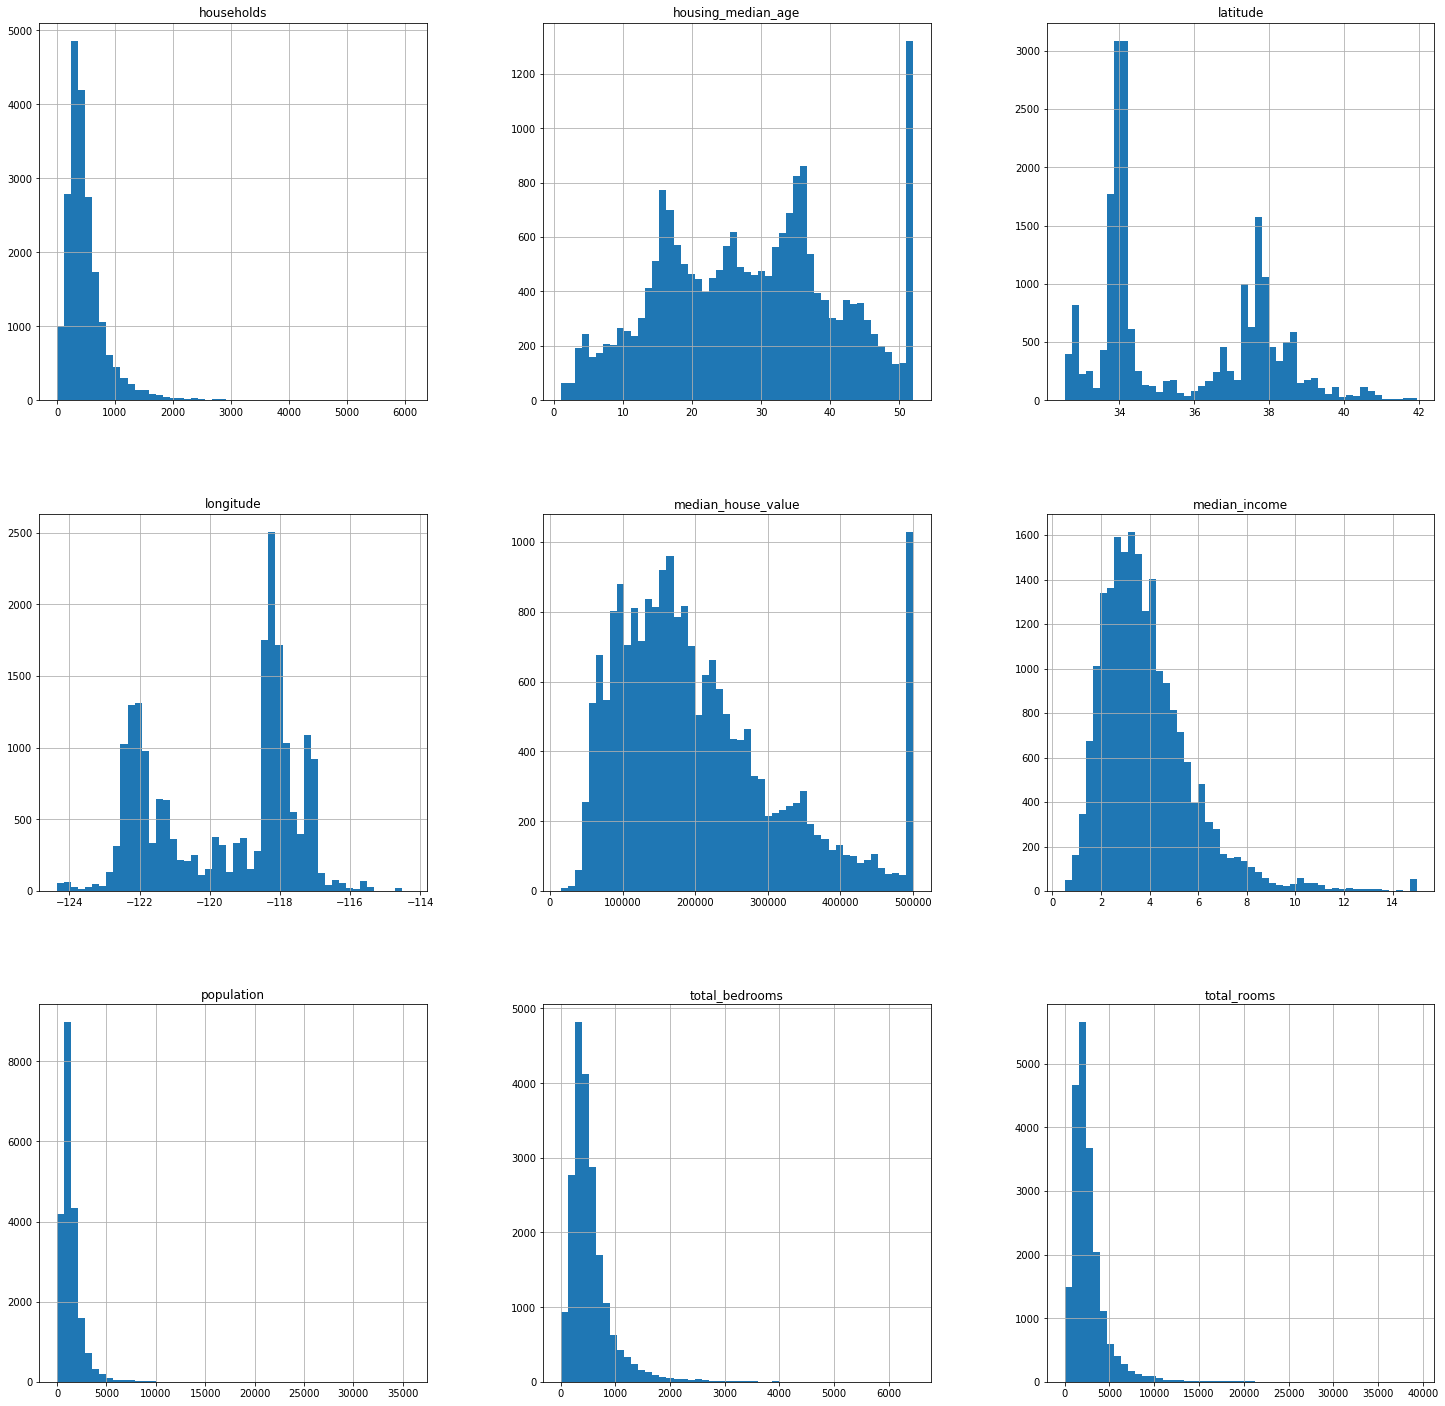

In [52]:
data.hist(figsize=(25,25),bins=50);

In [53]:
corelation  = data.corr()
corelation.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924664,-0.108197,0.044568,0.0692597,0.0997732,0.0553101,-0.0151759,-0.0459666
latitude,-0.924664,1,0.0111727,-0.0360996,-0.0666584,-0.108785,-0.0710354,-0.0798091,-0.14416
housing_median_age,-0.108197,0.0111727,1,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.0360996,-0.361262,1,0.927253,0.857126,0.918484,0.19805,0.134153
total_bedrooms,0.0692597,-0.0666584,-0.318998,0.927253,1,0.87391,0.974725,-0.00768188,0.0494535
population,0.0997732,-0.108785,-0.296244,0.857126,0.87391,1,0.907222,0.00483435,-0.0246497
households,0.0553101,-0.0710354,-0.302916,0.918484,0.974725,0.907222,1,0.0130331,0.0658427
median_income,-0.0151759,-0.0798091,-0.119034,0.19805,-0.00768188,0.00483435,0.0130331,1,0.688075
median_house_value,-0.0459666,-0.14416,0.105623,0.134153,0.0494535,-0.0246497,0.0658427,0.688075,1


In [54]:
#Converting categorical column in the dataset to numerical data
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
print(data["ocean_proximity"].value_counts())
data["ocean_proximity"] = labelEncoder.fit_transform(data["ocean_proximity"])
data["ocean_proximity"].value_counts()
data.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


In [55]:
data_ind = data.drop('median_house_value',axis=1)
data_ind=data_ind.drop('longitude',axis=1)
data_ind=data_ind.drop('latitude',axis=1)
print(data_ind.head())
data_dep = data["median_house_value"]
print("Medain Housing Values")
print(data_dep.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                  41          880           129.0         322         126   
1                  21         7099          1106.0        2401        1138   
2                  52         1467           190.0         496         177   
3                  52         1274           235.0         558         219   
4                  52         1627           280.0         565         259   

   median_income  ocean_proximity  
0         8.3252                3  
1         8.3014                3  
2         7.2574                3  
3         5.6431                3  
4         3.8462                3  
Medain Housing Values
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


In [56]:
#Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_ind,data_dep,test_size=0.2,random_state=42)

In [57]:
#Standardize training and test datasets
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.fit_transform(X_test)
print(X_train[0:3,:])
print("test data")
print(X_test[0:3,:])

[[ 0.34849025  0.22256942  0.21122752  0.76827628  0.32290591 -0.326196
   2.00593172]
 [ 1.61811813  0.34029326  0.59309419 -0.09890135  0.6720272  -0.03584338
   2.00593172]
 [-1.95271028 -0.34259695 -0.49522582 -0.44981806 -0.43046109  0.14470145
   2.00593172]]
test data
[[-0.30073951 -0.50056608  0.00596058 -0.02654818 -0.3578599  -1.14237625
  -0.13376479]
 [ 0.098724    0.15038025  0.00596058  0.12876364  0.22245041 -0.69050482
  -0.13376479]
 [ 1.85636346  0.55190278  0.00596058 -0.10016419  1.19995088 -0.18616932
   1.2571195 ]]


C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
#linear regression
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression(n_jobs=-1)
linearRegModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [59]:
y_pred = linearRegModel.predict(X_test)

In [60]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

76883.32739734487
75602.23799946297


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [71]:
print(y_test,y_pred)

20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
13311    158700
7113     198200
7668     157500
18246    340000
5723     446600
20069    123200
6835     253900
11351    215100
20267    220500
7097     219800
6298     136200
696      178400
19607    187500
14173    139800
19638    137500
18332    425000
4691     405600
2323     138800
16880    500001
14521    162100
19833     51400
8383     151300
2647      94800
1456     204100
5678     361500
          ...  
146      273700
4989     116400
16215     59400
241      137000
18746    119200
3595     244200
8404     170000
10360    280300
5714     285000
12401    102600
1952     120500
15800    361600
1594     455300
9161     213400
8478     158000
10087    217000
2680      63700
844      244300
4779     151100
11919    110800
4653     433800
1783      72900
7608     108500
0        452600
10155    467600
15362    263300
16623    266800
18086    500001
2144      72300
3665     151500
Name: median_house_value

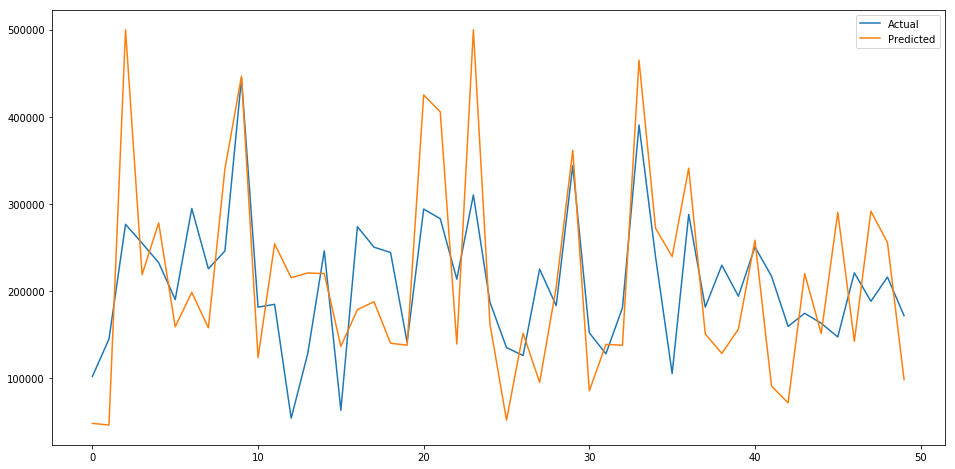

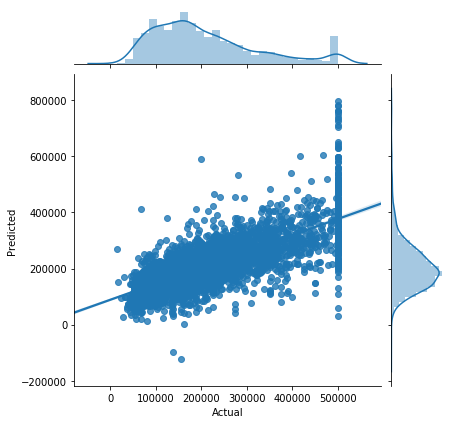

In [61]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [62]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
decision_tree =DecisionTreeRegressor(max_depth=9)
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
decision_tree_y_pred= decision_tree.predict(X_test)
decision_tree_y_pred

array([ 72741.26394052, 103184.98542274, 216000.        , ...,
       496145.68421053, 103184.98542274, 172253.38345865])

In [64]:
#root mean sqare error
print(np.sqrt(metrics.mean_squared_error(y_test,decision_tree_y_pred)))


73381.39149377131


In [65]:
#random forest
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor(30)
random_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
import xgboost

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [66]:
random_forest_y_pred =random_forest.predict(X_test)

In [67]:
print(np.sqrt(metrics.mean_squared_error(y_test,random_forest_y_pred)))

64633.89605377705


In [68]:
#linear regression with one independent variable
#Extract median_income 
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
print(dropcol)
data_med = data_ind.drop(dropcol,axis=1)
print(type(data_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']


KeyError: "['longitude' 'latitude'] not found in axis"

In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(data_med,data_dep,test_size=0.2,random_state=42)

In [ ]:
linear_regression_two = LinearRegression()
linear_regression_two.fit(X_train2,y_train2)

In [ ]:
y_pred2 = linear_regression_two.predict(X_test2)

In [ ]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,linear_regression_two.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")